<a href="https://colab.research.google.com/github/HarshESC/TalkData-Mobile-Demographics/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive 
drive.mount('/content/gdrive')
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/"
%cd "/content/gdrive/My Drive/Final Capstone"

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import (
    Activation,
    Dropout,
    Flatten,
    Dense,
    BatchNormalization,
)
from tensorflow.keras import backend as K
from sklearn.metrics import classification_report


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Final Capstone


In [2]:
master_df = pd.read_csv("master_clean_2.csv")
X = master_df.drop(columns=["num_group"])
y = master_df["num_group"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=13, stratify=y
)


In [3]:
X_test


,event_id,app_id,is_active,device_id,label_id_x,download_id,251,252,405,548,549,704,713,730,756,757,761,775,777,779,782,783,787,959,960,1007,english_phone_brand_coolpad,english_phone_brand_huawei,english_phone_brand_lshi,english_phone_brand_meizu,english_phone_brand_oppo,english_phone_brand_samsung,english_phone_brand_xiaomi,device_model_Galaxy Note 3,device_model_MI 4,device_model_MX4,device_model_MX5,device_model_Mate 7,device_model_R7s,device_model_U3,device_model_note顶配版,device_model_小米note,device_model_荣耀6,device_model_荣耀6 Plus,device_model_超级手机1 Pro,device_model_魅蓝metal,device_model_麦芒4
3972,331345,-1633912816187681087,1,-9170266620213363189,787,7642564637308507340,1,1,1,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
34708,3137225,4348659952760821294,1,-1665198983206396063,548,2683460969554425231,1,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1279,144053,-8103714741965524240,0,2596032420261205364,787,-5507682321704318876,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8021,663472,-1200607960388315089,0,5499466531572133131,713,4298858571183818042,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10225,913759,33792862810792679,0,1734050676638523012,713,1767843539449315691,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34832,3148380,-9050100410106163077,0,-1544445963999571951,787,7852197699603816588,1,0,1,1,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
471,45155,7316250158002095415,0,-4483258470894206861,757,2832991687107888554,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
14095,1165984,-1073344577746533072,0,5499466531572133131,730,4426121953825600059,1,0,1,1,1,0,0,1,1,1,0,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
23610,2117736,-974457023668610292,0,-6335083146238767307,761,-7309540169907377599,0,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [4]:
y_test


3972      5
34708     5
1279     10
8021      5
10225     5
         ..
34832     4
471       1
14095     5
23610     3
12927     5
Name: num_group, Length: 7208, dtype: int64

In [5]:
master_df["num_group"].value_counts()


5     11416
4      9521
3      5955
10     2862
9      2060
11     1697
1      1596
2       585
0       345
Name: num_group, dtype: int64

In [6]:
# Output_dim = 12 because there are 12 different age/gender groups
output_dim = 12


In [7]:
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train = to_categorical(y_train, output_dim)
y_test = to_categorical(y_test, output_dim)


# 128 Batch, 20 Epocs

# 3 Layer RELU Model with ADAM Optimizer


In [8]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_np.shape[1], activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(12, activation="softmax"))


In [9]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [10]:
model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1)


Epoch 1/20
226/226 [==============================] - 1s 3ms/step - loss: 63753523879215104.0000 - accuracy: 0.3068
Epoch 2/20
226/226 [==============================] - 1s 3ms/step - loss: 17990277973147648.0000 - accuracy: 0.3262
Epoch 3/20
226/226 [==============================] - 1s 3ms/step - loss: 14696937852764160.0000 - accuracy: 0.3436
Epoch 4/20
226/226 [==============================] - 1s 3ms/step - loss: 13327521890172928.0000 - accuracy: 0.3450
Epoch 5/20
226/226 [==============================] - 1s 3ms/step - loss: 14020176634707968.0000 - accuracy: 0.3440
Epoch 6/20
226/226 [==============================] - 1s 3ms/step - loss: 11817452191088640.0000 - accuracy: 0.3556
Epoch 7/20
226/226 [==============================] - 1s 3ms/step - loss: 10805636279304192.0000 - accuracy: 0.3545
Epoch 8/20
226/226 [==============================] - 1s 3ms/step - loss: 11359784770994176.0000 - accuracy: 0.3527
Epoch 9/20
226/226 [==============================] - 1s 3ms/step - loss

In [11]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", score[1])


Test accuracy: 0.30965593457221985


In [12]:
y_pred = model.predict(X_test)
y_test_arg = tf.argmax(y_test, 1)
y_pred_arg = tf.argmax(y_pred, 1)


In [13]:
print("Classification Report:")
print()
print(classification_report(y_test_arg, y_pred_arg))

Classification Report:

              precision    recall  f1-score   support

           0       0.03      0.12      0.05        69
           1       0.06      0.12      0.08       319
           2       0.00      0.00      0.00       117
           3       0.33      0.14      0.20      1191
           4       0.35      0.32      0.34      1904
           5       0.53      0.36      0.43      2283
           9       0.24      0.58      0.34       412
          10       0.24      0.52      0.33       573
          11       0.13      0.09      0.11       340

    accuracy                           0.31      7208
   macro avg       0.21      0.25      0.21      7208
weighted avg       0.36      0.31      0.31      7208



# 3 Layer RELU Model with SGD Optimizer


In [14]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_np.shape[1], activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(12, activation="softmax"))


In [15]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


In [18]:
model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1)


Epoch 1/20
77/77 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0520
Epoch 2/20
77/77 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0521
Epoch 3/20
77/77 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0521
Epoch 4/20
77/77 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0521
Epoch 5/20
77/77 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0521
Epoch 6/20
77/77 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0521
Epoch 7/20
77/77 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0521
Epoch 8/20
77/77 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0521
Epoch 9/20
77/77 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0521
Epoch 10/20
77/77 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0521
Epoch 11/20
77/77 [==============================

In [16]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", score[1])


Test accuracy: 0.01359600480645895


In [17]:
y_pred = model.predict(X_test)
y_test_arg = tf.argmax(y_test, 1)
y_pred_arg = tf.argmax(y_pred, 1)


In [18]:
print("Classification Report:")
print()
print(classification_report(y_test_arg, y_pred_arg))

Classification Report:

              precision    recall  f1-score   support

           0       0.02      0.30      0.04        69
           1       0.00      0.00      0.00       319
           2       0.01      0.66      0.02       117
           3       0.00      0.00      0.00      1191
           4       0.00      0.00      0.00      1904
           5       0.00      0.00      0.00      2283
           9       0.00      0.00      0.00       412
          10       0.00      0.00      0.00       573
          11       0.00      0.00      0.00       340

    accuracy                           0.01      7208
   macro avg       0.00      0.11      0.01      7208
weighted avg       0.00      0.01      0.00      7208



# 3 Layer TANH Model with ADAM Optimizer

In [19]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_np.shape[1], activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dense(12, activation="softmax"))


In [20]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [21]:
model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1)


Epoch 1/20
226/226 [==============================] - 1s 3ms/step - loss: 1.9324 - accuracy: 0.3638
Epoch 2/20
226/226 [==============================] - 1s 2ms/step - loss: 1.4952 - accuracy: 0.4345
Epoch 3/20
226/226 [==============================] - 1s 2ms/step - loss: 1.4110 - accuracy: 0.4624
Epoch 4/20
226/226 [==============================] - 1s 3ms/step - loss: 1.3626 - accuracy: 0.4797
Epoch 5/20
226/226 [==============================] - 1s 3ms/step - loss: 1.3261 - accuracy: 0.4903
Epoch 6/20
226/226 [==============================] - 1s 3ms/step - loss: 1.2958 - accuracy: 0.5065
Epoch 7/20
226/226 [==============================] - 1s 2ms/step - loss: 1.2734 - accuracy: 0.5140
Epoch 8/20
226/226 [==============================] - 1s 3ms/step - loss: 1.2501 - accuracy: 0.5207
Epoch 9/20
226/226 [==============================] - 1s 2ms/step - loss: 1.2343 - accuracy: 0.5273
Epoch 10/20
226/226 [==============================] - 1s 2ms/step - loss: 1.2204 - accuracy: 0.5305

In [22]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", score[1])


Test accuracy: 0.5602108836174011


In [23]:
y_pred = model.predict(X_test)
y_test_arg = tf.argmax(y_test, 1)
y_pred_arg = tf.argmax(y_pred, 1)


In [24]:
print("Classification Report:")
print()
print(classification_report(y_test_arg , y_pred_arg))

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.89      0.23      0.36       319
           2       0.55      0.15      0.24       117
           3       0.51      0.68      0.58      1191
           4       0.59      0.49      0.54      1904
           5       0.54      0.73      0.62      2283
           9       0.55      0.38      0.45       412
          10       0.70      0.49      0.58       573
          11       0.62      0.28      0.38       340

    accuracy                           0.56      7208
   macro avg       0.55      0.38      0.42      7208
weighted avg       0.58      0.56      0.54      7208



# 3 Layer TANH Model with SGD Optimizer

In [25]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_np.shape[1], activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dense(12, activation="softmax"))


In [26]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


In [27]:
model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1)


Epoch 1/20
226/226 [==============================] - 1s 2ms/step - loss: 2.1781 - accuracy: 0.3028
Epoch 2/20
226/226 [==============================] - 0s 2ms/step - loss: 1.8482 - accuracy: 0.3851
Epoch 3/20
226/226 [==============================] - 0s 2ms/step - loss: 1.6872 - accuracy: 0.4030
Epoch 4/20
226/226 [==============================] - 0s 2ms/step - loss: 1.6083 - accuracy: 0.4154
Epoch 5/20
226/226 [==============================] - 0s 2ms/step - loss: 1.5651 - accuracy: 0.4233
Epoch 6/20
226/226 [==============================] - 0s 2ms/step - loss: 1.5351 - accuracy: 0.4309
Epoch 7/20
226/226 [==============================] - 0s 2ms/step - loss: 1.5112 - accuracy: 0.4371
Epoch 8/20
226/226 [==============================] - 0s 2ms/step - loss: 1.4916 - accuracy: 0.4468
Epoch 9/20
226/226 [==============================] - 0s 2ms/step - loss: 1.4748 - accuracy: 0.4502
Epoch 10/20
226/226 [==============================] - 0s 2ms/step - loss: 1.4599 - accuracy: 0.4550

In [28]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", score[1])


Test accuracy: 0.4977802336215973


In [29]:
y_pred = model.predict(X_test)
y_test_arg = tf.argmax(y_test, 1)
y_pred_arg = tf.argmax(y_pred, 1)


In [30]:
res = tf.math.confusion_matrix(y_test_arg, y_pred_arg)
print(res)


tf.Tensor(
[[   0    0    0   16   26   27    0    0    0    0    0    0]
 [   0   76    0   36   56  147    0    0    0    0    4    0]
 [   0    0    0   64   35   18    0    0    0    0    0    0]
 [   0    0    0  836  150  198    0    0    0    0    7    0]
 [   0    0    0  320  782  761    0    0    0    0   33    8]
 [   0    8    0  263  345 1634    0    0    0    0   33    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0   19  191  174    0    0    0   16   12    0]
 [   0    0    0   19   93  217    0    0    0    0  244    0]
 [   0    0    0   62  100  178    0    0    0    0    0    0]], shape=(12, 12), dtype=int32)


In [31]:
print("Classification Report:")
print()
print(classification_report(y_test_arg, y_pred_arg))

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.90      0.24      0.38       319
           2       0.00      0.00      0.00       117
           3       0.51      0.70      0.59      1191
           4       0.44      0.41      0.42      1904
           5       0.49      0.72      0.58      2283
           9       1.00      0.04      0.07       412
          10       0.73      0.43      0.54       573
          11       0.00      0.00      0.00       340

    accuracy                           0.50      7208
   macro avg       0.45      0.28      0.29      7208
weighted avg       0.51      0.50      0.46      7208



# 3 Layer Sigmoid with ADAM Optimizer

In [32]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_np.shape[1], activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(12, activation="softmax"))


In [33]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [34]:
model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1)


Epoch 1/20
226/226 [==============================] - 1s 2ms/step - loss: 1.7320 - accuracy: 0.3393
Epoch 2/20
226/226 [==============================] - 1s 3ms/step - loss: 1.5949 - accuracy: 0.3818
Epoch 3/20
226/226 [==============================] - 1s 3ms/step - loss: 1.5504 - accuracy: 0.4031
Epoch 4/20
226/226 [==============================] - 1s 3ms/step - loss: 1.5136 - accuracy: 0.4159
Epoch 5/20
226/226 [==============================] - 1s 3ms/step - loss: 1.4844 - accuracy: 0.4264
Epoch 6/20
226/226 [==============================] - 1s 3ms/step - loss: 1.4623 - accuracy: 0.4371
Epoch 7/20
226/226 [==============================] - 1s 2ms/step - loss: 1.4409 - accuracy: 0.4493
Epoch 8/20
226/226 [==============================] - 1s 3ms/step - loss: 1.4242 - accuracy: 0.4548
Epoch 9/20
226/226 [==============================] - 1s 2ms/step - loss: 1.4096 - accuracy: 0.4606
Epoch 10/20
226/226 [==============================] - 1s 2ms/step - loss: 1.3928 - accuracy: 0.4696

In [35]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", score[1])


Test accuracy: 0.5095726847648621


In [36]:
y_pred = model.predict(X_test)
y_test_arg = tf.argmax(y_test, 1)
y_pred_arg = tf.argmax(y_pred, 1)


In [37]:
print("Classification Report:")
print()
print(classification_report(y_test_arg, y_pred_arg))

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.71      0.29      0.41       319
           2       0.00      0.00      0.00       117
           3       0.51      0.71      0.59      1191
           4       0.46      0.43      0.45      1904
           5       0.51      0.71      0.60      2283
           9       0.49      0.17      0.25       412
          10       0.83      0.29      0.43       573
          11       0.47      0.14      0.21       340

    accuracy                           0.51      7208
   macro avg       0.44      0.30      0.33      7208
weighted avg       0.52      0.51      0.48      7208



# 3 Layer Sigmoid with SGD Optimizer

In [38]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_np.shape[1], activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(12, activation="softmax"))


In [39]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


In [40]:
model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1)


Epoch 1/20
226/226 [==============================] - 1s 2ms/step - loss: 1.9146 - accuracy: 0.2951
Epoch 2/20
226/226 [==============================] - 1s 2ms/step - loss: 1.7372 - accuracy: 0.3304
Epoch 3/20
226/226 [==============================] - 0s 2ms/step - loss: 1.7005 - accuracy: 0.3518
Epoch 4/20
226/226 [==============================] - 1s 2ms/step - loss: 1.6793 - accuracy: 0.3536
Epoch 5/20
226/226 [==============================] - 0s 2ms/step - loss: 1.6657 - accuracy: 0.3537
Epoch 6/20
226/226 [==============================] - 0s 2ms/step - loss: 1.6559 - accuracy: 0.3541
Epoch 7/20
226/226 [==============================] - 0s 2ms/step - loss: 1.6486 - accuracy: 0.3578
Epoch 8/20
226/226 [==============================] - 0s 2ms/step - loss: 1.6428 - accuracy: 0.3603
Epoch 9/20
226/226 [==============================] - 0s 2ms/step - loss: 1.6379 - accuracy: 0.3627
Epoch 10/20
226/226 [==============================] - 0s 2ms/step - loss: 1.6339 - accuracy: 0.3643

In [41]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", score[1])


Test accuracy: 0.3920643627643585


In [42]:
y_pred = model.predict(X_test)
y_test_arg = tf.argmax(y_test, 1)
y_pred_arg = tf.argmax(y_pred, 1)


In [43]:
print("Classification Report:")
print()
print(classification_report(y_test_arg, y_pred_arg))

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.00      0.00      0.00       319
           2       0.00      0.00      0.00       117
           3       0.39      0.76      0.52      1191
           4       0.44      0.10      0.16      1904
           5       0.39      0.76      0.51      2283
           9       0.00      0.00      0.00       412
          10       0.00      0.00      0.00       573
          11       0.00      0.00      0.00       340

    accuracy                           0.39      7208
   macro avg       0.14      0.18      0.13      7208
weighted avg       0.30      0.39      0.29      7208



# 64 Batch Size, 100 Epocs

--------------------------------------------------------------------------------

# 3 Layer RELU with ADAM Optimizer 

In [44]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_np.shape[1], activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(12, activation="softmax"))


In [45]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [46]:
model.fit(X_train, y_train, batch_size=64, epochs=100, verbose=1)


Epoch 1/100
451/451 [==============================] - 2s 2ms/step - loss: 58712190051418112.0000 - accuracy: 0.3090
Epoch 2/100
451/451 [==============================] - 1s 2ms/step - loss: 24121743220146176.0000 - accuracy: 0.3343
Epoch 3/100
451/451 [==============================] - 1s 2ms/step - loss: 21452659416367104.0000 - accuracy: 0.3399
Epoch 4/100
451/451 [==============================] - 1s 2ms/step - loss: 17305276860334080.0000 - accuracy: 0.3462
Epoch 5/100
451/451 [==============================] - 1s 2ms/step - loss: 15072625084596224.0000 - accuracy: 0.3509
Epoch 6/100
451/451 [==============================] - 1s 2ms/step - loss: 13666652507865088.0000 - accuracy: 0.3530
Epoch 7/100
451/451 [==============================] - 1s 2ms/step - loss: 12495684435443712.0000 - accuracy: 0.3567
Epoch 8/100
451/451 [==============================] - 1s 2ms/step - loss: 10145996948373504.0000 - accuracy: 0.3587
Epoch 9/100
451/451 [==============================] - 1s 2ms/st

In [47]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", score[1])


Test accuracy: 0.32741397619247437


In [48]:
y_pred = model.predict(X_test)
y_test_arg = tf.argmax(y_test, 1)
y_pred_arg = tf.argmax(y_pred, 1)


In [49]:
print("Classification Report:")
print()
print(classification_report(y_test_arg, y_pred_arg))

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       1.00      0.17      0.29       319
           2       0.00      0.00      0.00       117
           3       0.00      0.00      0.00      1191
           4       1.00      0.00      0.00      1904
           5       0.32      1.00      0.49      2283
           9       0.00      0.00      0.00       412
          10       1.00      0.03      0.07       573
          11       0.00      0.00      0.00       340

    accuracy                           0.33      7208
   macro avg       0.37      0.13      0.09      7208
weighted avg       0.49      0.33      0.17      7208



# 3 Layer RELU Model with SGD Optimizer


In [50]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_np.shape[1], activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(12, activation="softmax"))


In [51]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


In [52]:
model.fit(X_train, y_train, batch_size=64, epochs=100, verbose=1)


Epoch 1/100
451/451 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0097
Epoch 2/100
451/451 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0096
Epoch 3/100
451/451 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0096
Epoch 4/100
451/451 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0096
Epoch 5/100
451/451 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0096
Epoch 6/100
451/451 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0096
Epoch 7/100
451/451 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0096
Epoch 8/100
451/451 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0096
Epoch 9/100
451/451 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0096
Epoch 10/100
451/451 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0096
Epoch 11/100
451/45

In [53]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", score[1])


Test accuracy: 0.00957269687205553


In [54]:
y_pred = model.predict(X_test)
y_test_arg = tf.argmax(y_test, 1)
y_pred_arg = tf.argmax(y_pred, 1)


In [55]:
print("Classification Report:")
print()
print(classification_report(y_test_arg, y_pred_arg))

Classification Report:

              precision    recall  f1-score   support

           0       0.01      1.00      0.02        69
           1       0.00      0.00      0.00       319
           2       0.00      0.00      0.00       117
           3       0.00      0.00      0.00      1191
           4       0.00      0.00      0.00      1904
           5       0.00      0.00      0.00      2283
           9       0.00      0.00      0.00       412
          10       0.00      0.00      0.00       573
          11       0.00      0.00      0.00       340

    accuracy                           0.01      7208
   macro avg       0.00      0.11      0.00      7208
weighted avg       0.00      0.01      0.00      7208



# 3 Layer TANH Model with ADAM Optimizer

In [56]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_np.shape[1], activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dense(12, activation="softmax"))


In [57]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [58]:
model.fit(X_train, y_train, batch_size=64, epochs=100, verbose=1)


Epoch 1/100
451/451 [==============================] - 1s 2ms/step - loss: 1.7792 - accuracy: 0.3868
Epoch 2/100
451/451 [==============================] - 1s 2ms/step - loss: 1.4400 - accuracy: 0.4472
Epoch 3/100
451/451 [==============================] - 1s 2ms/step - loss: 1.3713 - accuracy: 0.4703
Epoch 4/100
451/451 [==============================] - 1s 2ms/step - loss: 1.3260 - accuracy: 0.4915
Epoch 5/100
451/451 [==============================] - 1s 2ms/step - loss: 1.2952 - accuracy: 0.5016
Epoch 6/100
451/451 [==============================] - 1s 2ms/step - loss: 1.2708 - accuracy: 0.5115
Epoch 7/100
451/451 [==============================] - 1s 2ms/step - loss: 1.2489 - accuracy: 0.5200
Epoch 8/100
451/451 [==============================] - 1s 2ms/step - loss: 1.2316 - accuracy: 0.5235
Epoch 9/100
451/451 [==============================] - 1s 2ms/step - loss: 1.2140 - accuracy: 0.5293
Epoch 10/100
451/451 [==============================] - 1s 2ms/step - loss: 1.1997 - accura

In [59]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", score[1])


Test accuracy: 0.5918424129486084


In [60]:
y_pred = model.predict(X_test)
y_test_arg = tf.argmax(y_test, 1)
y_pred_arg = tf.argmax(y_pred, 1)


In [61]:
print("Classification Report:")
print()
print(classification_report(y_test_arg , y_pred_arg))

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.06      0.11        69
           1       0.80      0.36      0.50       319
           2       0.88      0.12      0.21       117
           3       0.55      0.72      0.63      1191
           4       0.55      0.59      0.57      1904
           5       0.60      0.70      0.65      2283
           9       0.69      0.33      0.45       412
          10       0.70      0.57      0.63       573
          11       0.75      0.25      0.38       340

    accuracy                           0.59      7208
   macro avg       0.70      0.41      0.46      7208
weighted avg       0.61      0.59      0.58      7208



# 3 Layer TANH Model with SGD Optimizer

In [62]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_np.shape[1], activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dense(12, activation="softmax"))


In [63]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


In [64]:
model.fit(X_train, y_train, batch_size=64, epochs=100, verbose=1)


Epoch 1/100
451/451 [==============================] - 1s 2ms/step - loss: 2.0053 - accuracy: 0.3411
Epoch 2/100
451/451 [==============================] - 1s 2ms/step - loss: 1.6535 - accuracy: 0.4126
Epoch 3/100
451/451 [==============================] - 1s 1ms/step - loss: 1.5654 - accuracy: 0.4270
Epoch 4/100
451/451 [==============================] - 1s 2ms/step - loss: 1.5226 - accuracy: 0.4406
Epoch 5/100
451/451 [==============================] - 1s 1ms/step - loss: 1.4933 - accuracy: 0.4469
Epoch 6/100
451/451 [==============================] - 1s 2ms/step - loss: 1.4700 - accuracy: 0.4552
Epoch 7/100
451/451 [==============================] - 1s 1ms/step - loss: 1.4512 - accuracy: 0.4592
Epoch 8/100
451/451 [==============================] - 1s 1ms/step - loss: 1.4335 - accuracy: 0.4659
Epoch 9/100
451/451 [==============================] - 1s 1ms/step - loss: 1.4187 - accuracy: 0.4720
Epoch 10/100
451/451 [==============================] - 1s 2ms/step - loss: 1.4048 - accura

In [65]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", score[1])


Test accuracy: 0.5761653780937195


In [66]:
y_pred = model.predict(X_test)
y_test_arg = tf.argmax(y_test, 1)
y_pred_arg = tf.argmax(y_pred, 1)


In [67]:
res = tf.math.confusion_matrix(y_test_arg, y_pred_arg)
print(res)


tf.Tensor(
[[   0    0    2   35   12   18    0    0    0    0    0    2]
 [   0  107    1   44   44  111    0    0    0    4    0    8]
 [   0    1   21   79   10    5    0    0    0    0    0    1]
 [   0    2   13  964   83  103    0    0    0    3   12   11]
 [   0    1    1  414  923  463    0    0    0   55   24   23]
 [   0   21    3  348  179 1641    0    0    0   47   33   11]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    1    2   24   85  110    0    0    0  151    6   33]
 [   0    0    0   30   91  166    0    0    0   21  265    0]
 [   0    0    0   89   39  108    0    0    0   17    6   81]], shape=(12, 12), dtype=int32)


In [68]:
print("Classification Report:")
print()
print(classification_report(y_test_arg, y_pred_arg))

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.80      0.34      0.47       319
           2       0.49      0.18      0.26       117
           3       0.48      0.81      0.60      1191
           4       0.63      0.48      0.55      1904
           5       0.60      0.72      0.66      2283
           9       0.51      0.37      0.43       412
          10       0.77      0.46      0.58       573
          11       0.48      0.24      0.32       340

    accuracy                           0.58      7208
   macro avg       0.53      0.40      0.43      7208
weighted avg       0.59      0.58      0.56      7208



# 3 Layer Sigmoid with ADAM Optimizer

In [69]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_np.shape[1], activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(12, activation="softmax"))


In [70]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [71]:
model.fit(X_train, y_train, batch_size=64, epochs=100, verbose=1)


Epoch 1/100
451/451 [==============================] - 1s 2ms/step - loss: 1.6657 - accuracy: 0.3621
Epoch 2/100
451/451 [==============================] - 1s 2ms/step - loss: 1.5543 - accuracy: 0.3926
Epoch 3/100
451/451 [==============================] - 1s 2ms/step - loss: 1.5036 - accuracy: 0.4141
Epoch 4/100
451/451 [==============================] - 1s 2ms/step - loss: 1.4694 - accuracy: 0.4307
Epoch 5/100
451/451 [==============================] - 1s 2ms/step - loss: 1.4441 - accuracy: 0.4395
Epoch 6/100
451/451 [==============================] - 1s 2ms/step - loss: 1.4246 - accuracy: 0.4540
Epoch 7/100
451/451 [==============================] - 1s 2ms/step - loss: 1.4072 - accuracy: 0.4621
Epoch 8/100
451/451 [==============================] - 1s 2ms/step - loss: 1.3906 - accuracy: 0.4662
Epoch 9/100
451/451 [==============================] - 1s 2ms/step - loss: 1.3744 - accuracy: 0.4756
Epoch 10/100
451/451 [==============================] - 1s 2ms/step - loss: 1.3609 - accura

In [72]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", score[1])


Test accuracy: 0.5750554800033569


In [73]:
y_pred = model.predict(X_test)
y_test_arg = tf.argmax(y_test, 1)
y_pred_arg = tf.argmax(y_pred, 1)


In [74]:
print("Classification Report:")
print()
print(classification_report(y_test_arg, y_pred_arg))

Classification Report:

              precision    recall  f1-score   support

           0       0.43      0.14      0.22        69
           1       0.60      0.29      0.39       319
           2       0.41      0.32      0.36       117
           3       0.59      0.67      0.63      1191
           4       0.52      0.59      0.56      1904
           5       0.64      0.60      0.62      2283
           9       0.54      0.46      0.50       412
          10       0.55      0.66      0.60       573
          11       0.52      0.38      0.44       340

    accuracy                           0.58      7208
   macro avg       0.53      0.46      0.48      7208
weighted avg       0.58      0.58      0.57      7208



# 3 Layer Sigmoid with SGD Optimizer

In [75]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_np.shape[1], activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(12, activation="softmax"))


In [76]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


In [77]:
model.fit(X_train, y_train, batch_size=64, epochs=100, verbose=1)


Epoch 1/100
451/451 [==============================] - 1s 2ms/step - loss: 1.8248 - accuracy: 0.3015
Epoch 2/100
451/451 [==============================] - 1s 2ms/step - loss: 1.6948 - accuracy: 0.3469
Epoch 3/100
451/451 [==============================] - 1s 2ms/step - loss: 1.6688 - accuracy: 0.3595
Epoch 4/100
451/451 [==============================] - 1s 2ms/step - loss: 1.6551 - accuracy: 0.3661
Epoch 5/100
451/451 [==============================] - 1s 2ms/step - loss: 1.6454 - accuracy: 0.3681
Epoch 6/100
451/451 [==============================] - 1s 2ms/step - loss: 1.6379 - accuracy: 0.3682
Epoch 7/100
451/451 [==============================] - 1s 2ms/step - loss: 1.6314 - accuracy: 0.3713
Epoch 8/100
451/451 [==============================] - 1s 2ms/step - loss: 1.6260 - accuracy: 0.3730
Epoch 9/100
451/451 [==============================] - 1s 2ms/step - loss: 1.6209 - accuracy: 0.3765
Epoch 10/100
451/451 [==============================] - 1s 2ms/step - loss: 1.6162 - accura

In [78]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", score[1])


Test accuracy: 0.46711987257003784


In [79]:
y_pred = model.predict(X_test)
y_test_arg = tf.argmax(y_test, 1)
y_pred_arg = tf.argmax(y_pred, 1)


In [80]:
print("Classification Report:")
print()
print(classification_report(y_test_arg, y_pred_arg))

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.42      0.13      0.20       319
           2       0.00      0.00      0.00       117
           3       0.46      0.72      0.56      1191
           4       0.43      0.44      0.43      1904
           5       0.50      0.67      0.57      2283
           9       0.00      0.00      0.00       412
          10       0.49      0.18      0.26       573
          11       0.00      0.00      0.00       340

    accuracy                           0.47      7208
   macro avg       0.25      0.24      0.23      7208
weighted avg       0.40      0.47      0.42      7208



# Results

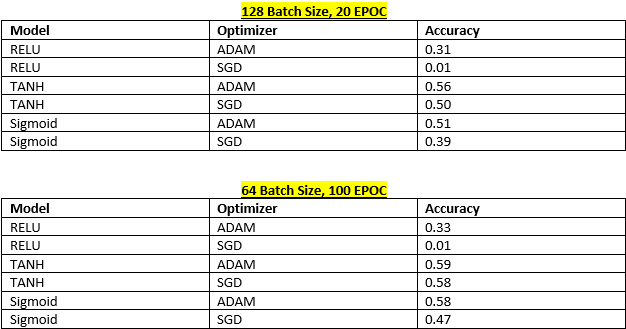

# Analysis

When creating the Deep Learning model, I used three different activation functions:  RELU, Tanh, and Sigmoid.

Each model only consisted of three layers, with two different optimizers applied for each model.  The optimizers are:  ADAM & SGD

Once I was able to determine which activation function and which optimizer provided the best results, I had increased the amount of epochs from 20 to 100.  I also decreased the batch size in the second table to see if it made a difference in accuracy.

Overall, it made a very small difference.  The most gain a model received was TANH Model with the SGD Optimizer, rising from 0.50 to 0.58 accuracy.  

The highest accuracy I was able to get was 0.59 from the TANH Model with ADAM Optimizer with the Batch Size set at 64 with an EPOC level at 100.  
